<a href="https://colab.research.google.com/github/Nurkyial/DataVisualization/blob/main/lab3_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Алмазова Нуркыял
М23-534

1.	Импортировать данные lab3.csv

In [ ]:
import pandas as pd
df = pd.read_csv('/content/lab3.csv')

2.	Построить линейный график зависимости суммы всех заказов в день, от даты (год-месяц-день). Здесь и далее пользоваться библиотекой seaborn для построения графиков. Библиотеку matplotlib использовать по необходимости, для задания размера графика. 2.1.	Повернуть подписи по оси x (даты) под углом 45 градусов.
  2.2.	Добавить название диаграммы


In [ ]:
orderSum = df.groupby('OrderDate').agg(sum=('OrderSum', 'sum'))

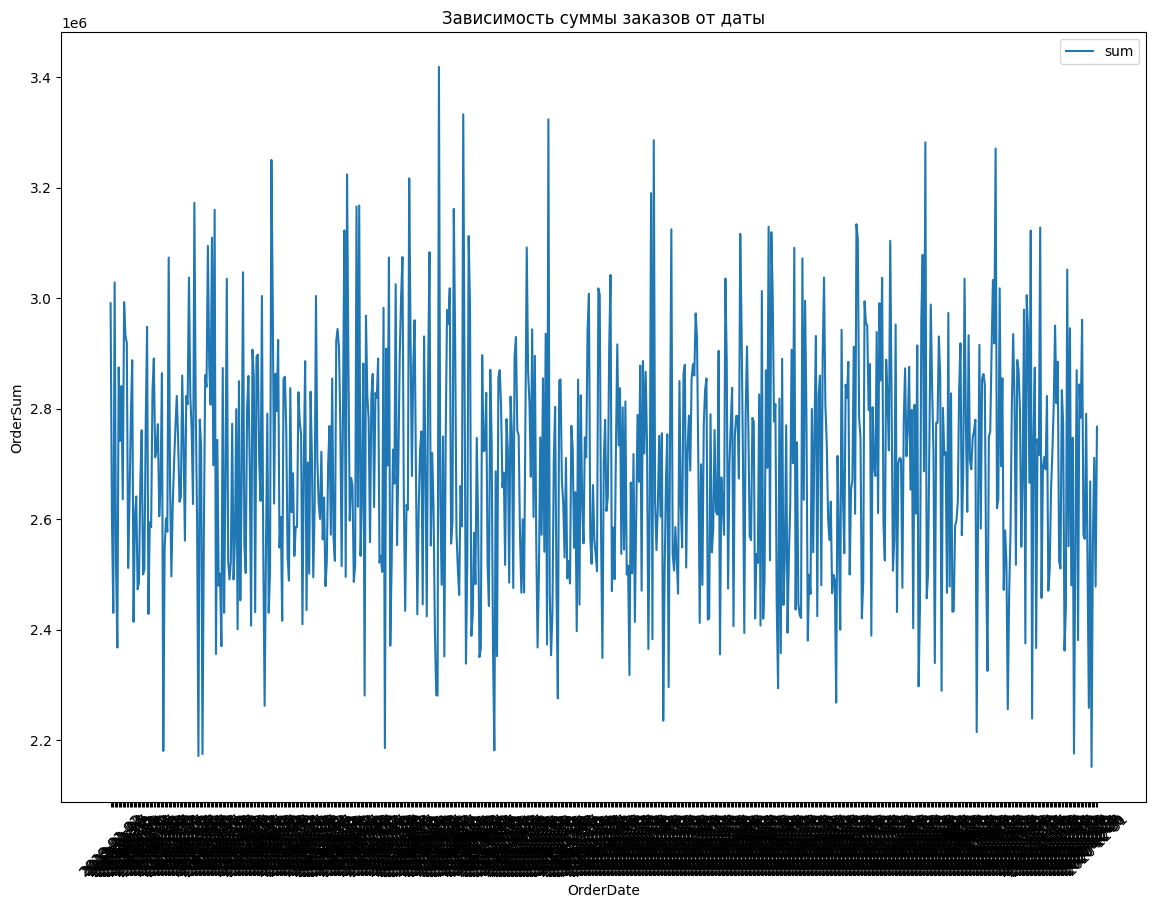

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))
sns.lineplot(data=orderSum)
plt.ylabel('OrderSum')
plt.xlabel('OrderDate')
plt.xticks(rotation=45)
plt.title('Зависимость суммы заказов от даты')
plt.show()

3.	Построить ящичковую диаграмму по распределению суммы заказа в зависимости от года заказа
  3.1.	Добавить параметр тон (hue) по полу клиента


In [ ]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['Year'] = df['OrderDate'].dt.year
print(df)

        OrderId  OrderDate  OrderSum  ClientId ClientSex  ClientAge  Year
0       1000000 2020-05-28   23217.0         0    female         53  2020
1       1000001 2020-04-18   25296.0         0    female         53  2020
2       1000002 2019-08-19   23500.0         0    female         53  2019
3       1000003 2019-06-02   23819.0         0    female         53  2019
4       1000004 2020-05-18   23161.0         0    female         53  2020
...         ...        ...       ...       ...       ...        ...   ...
129991  1999170 2020-04-15   22112.0       999    female         37  2020
129992  1999171 2019-09-12   25218.0       999    female         37  2019
129993  1999172 2020-09-10   21742.0       999    female         37  2020
129994  1999173 2020-08-10   24904.0       999    female         37  2020
129995  1999174 2019-08-12   23963.0       999    female         37  2019

[129996 rows x 7 columns]


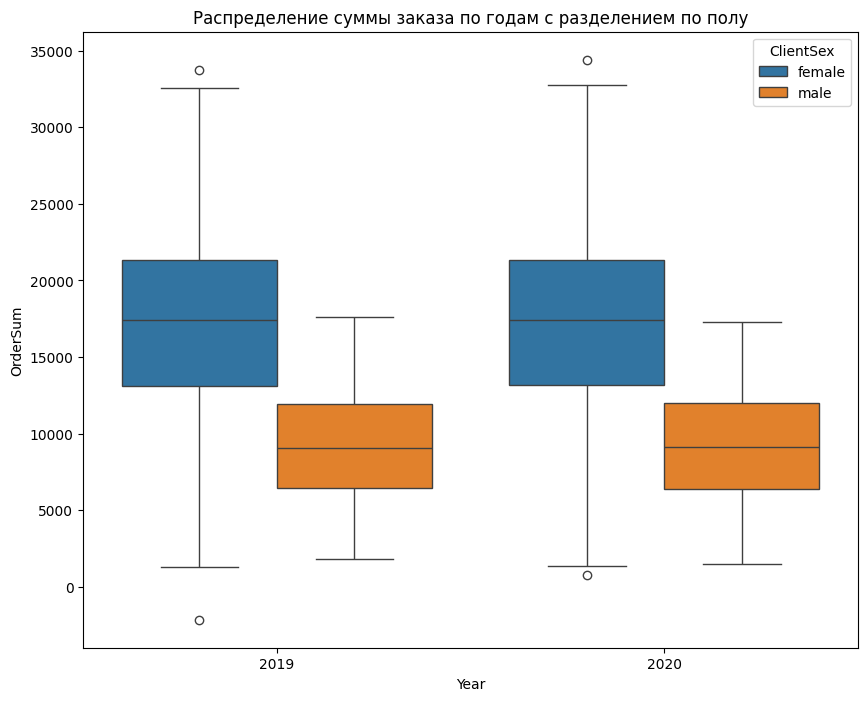

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Year', y='OrderSum', hue='ClientSex', data=df)
plt.title('Распределение суммы заказа по годам с разделением по полу')
plt.show()

4. Построить гистограмму распределения суммы заказа в зависимости от пола клиента
  4.1 Изменить цвет гистограммы на ярко-красный цвет, добавить темно-серую заливку области построения графика


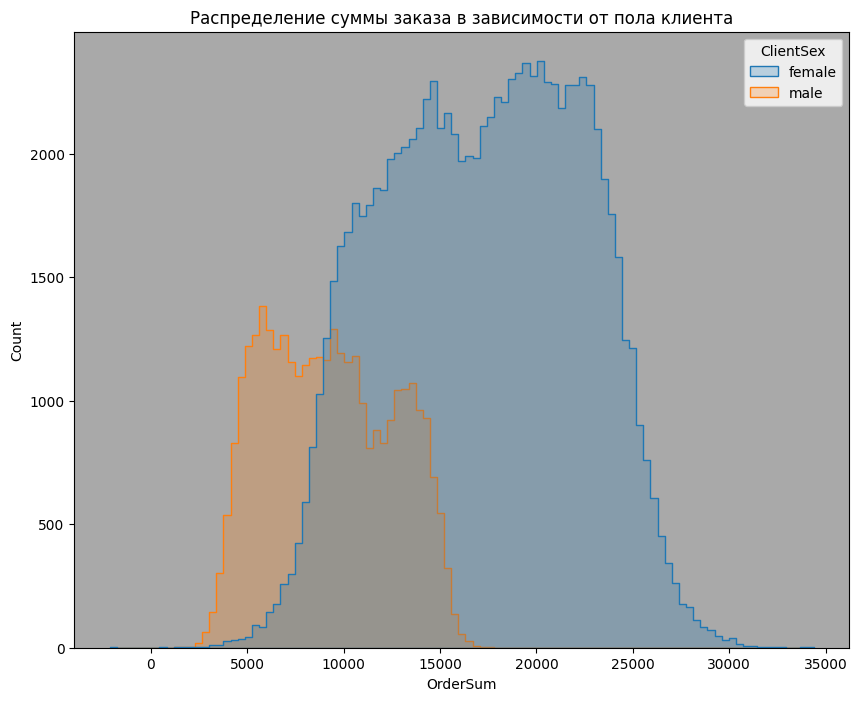

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(data=df, x='OrderSum', hue='ClientSex', color='red', element='step', fill=True)
ax.set_facecolor('darkgrey')
plt.title('Распределение суммы заказа в зависимости от пола клиента')
plt.show()

5. Построить столбчатую диаграмму зависимости максимальной суммы заказа от даты (месяц, без года)
  5.1 Изменить ориентацию диаграммы на горизонтальную столбчатую
  5.2 Добавить группировку столбцов по полу


In [ ]:
df['mm-dd'] = df['OrderDate'].dt.strftime('%m-%d')
df.head()

,OrderId,OrderDate,OrderSum,ClientId,ClientSex,ClientAge,Year,mm-dd
0,1000000,2020-05-28,23217.0,0,female,53,2020,05-28
1,1000001,2020-04-18,25296.0,0,female,53,2020,04-18
2,1000002,2019-08-19,23500.0,0,female,53,2019,08-19
3,1000003,2019-06-02,23819.0,0,female,53,2019,06-02
4,1000004,2020-05-18,23161.0,0,female,53,2020,05-18


In [ ]:
max_sum = df.groupby(['ClientSex', 'mm-dd'])['OrderSum'].max().reset_index()
print(max_sum)

    ClientSex  mm-dd  OrderSum
0      female  01-01   27759.0
1      female  01-02   26378.0
2      female  01-03   28615.0
3      female  01-04   30049.0
4      female  01-05   29053.0
..        ...    ...       ...
727      male  12-27   15312.0
728      male  12-28   15848.0
729      male  12-29   16093.0
730      male  12-30   14625.0
731      male  12-31   15563.0

[732 rows x 3 columns]


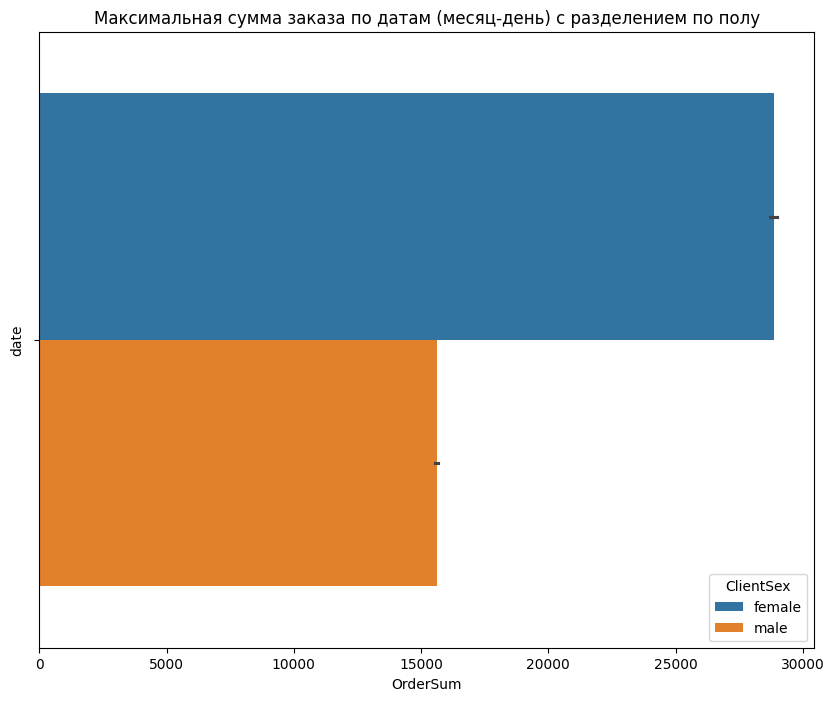

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(data=max_sum, x='OrderSum', hue='ClientSex', orient='h')
plt.title('Максимальная сумма заказа по датам (месяц-день) с разделением по полу')
plt.ylabel('date')
plt.show()

6. Построить тепловую карту по таблице – средняя сумма заказа по дате- (год-месяц) и полу клиента


In [ ]:
df['yy-mm'] = df['OrderDate'].dt.strftime('%y-%m')
df.head()

,OrderId,OrderDate,OrderSum,ClientId,ClientSex,ClientAge,Year,mm-dd,yy-mm
0,1000000,2020-05-28,23217.0,0,female,53,2020,05-28,20-05
1,1000001,2020-04-18,25296.0,0,female,53,2020,04-18,20-04
2,1000002,2019-08-19,23500.0,0,female,53,2019,08-19,19-08
3,1000003,2019-06-02,23819.0,0,female,53,2019,06-02,19-06
4,1000004,2020-05-18,23161.0,0,female,53,2020,05-18,20-05


In [ ]:
import numpy as np
avg_sum = df.groupby(['yy-mm', 'ClientSex'])['OrderSum'].agg(np.mean).reset_index()
table = avg_sum.pivot_table('yy-mm', 'ClientSex', 'OrderSum')
print(table)

NameError: name 'df' is not defined

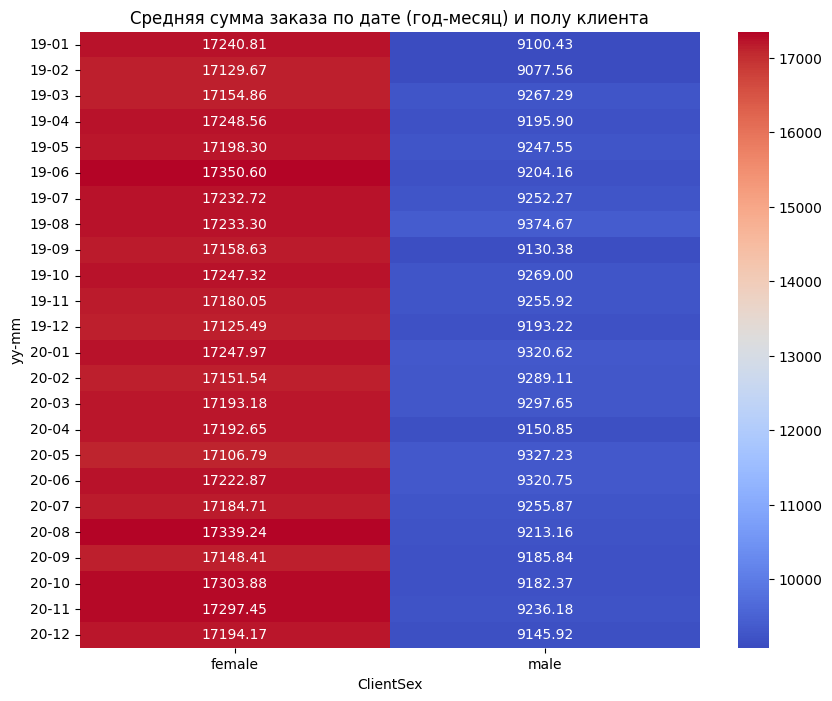

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=table, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Средняя сумма заказа по дате (год-месяц) и полу клиента')
plt.show()

7. Построить категориальную диаграмму рассеяния зависимости суммы заказа от пола
  7.1 Изменить стиль графика


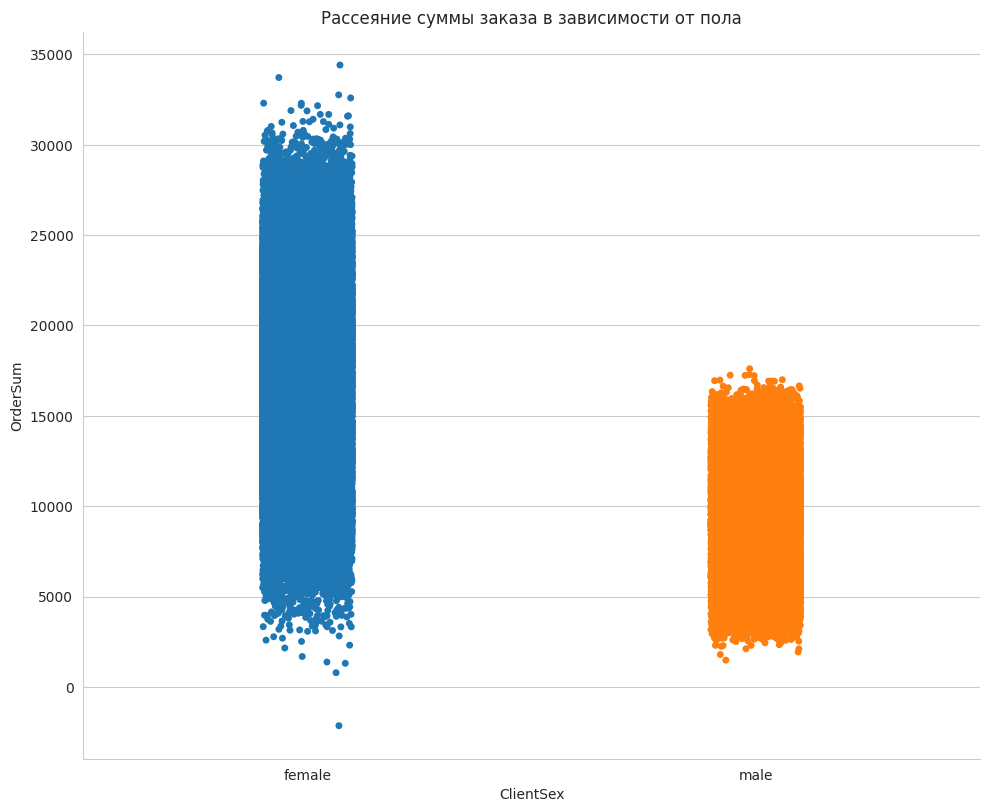

In [ ]:
sns.set_style('whitegrid')
sns.catplot(data=df,x='ClientSex', y='OrderSum', hue='ClientSex', height=8, aspect=1.25)
plt.title('Рассеяние суммы заказа в зависимости от пола')
plt.show()

8. Построить фасетчатую диаграмму, с гистограммами распределения суммы заказа, в зависимости от года заказа (столбцы) и пола клиента (строки).
  8.1 Заменить гистограммы на скрипичные графики


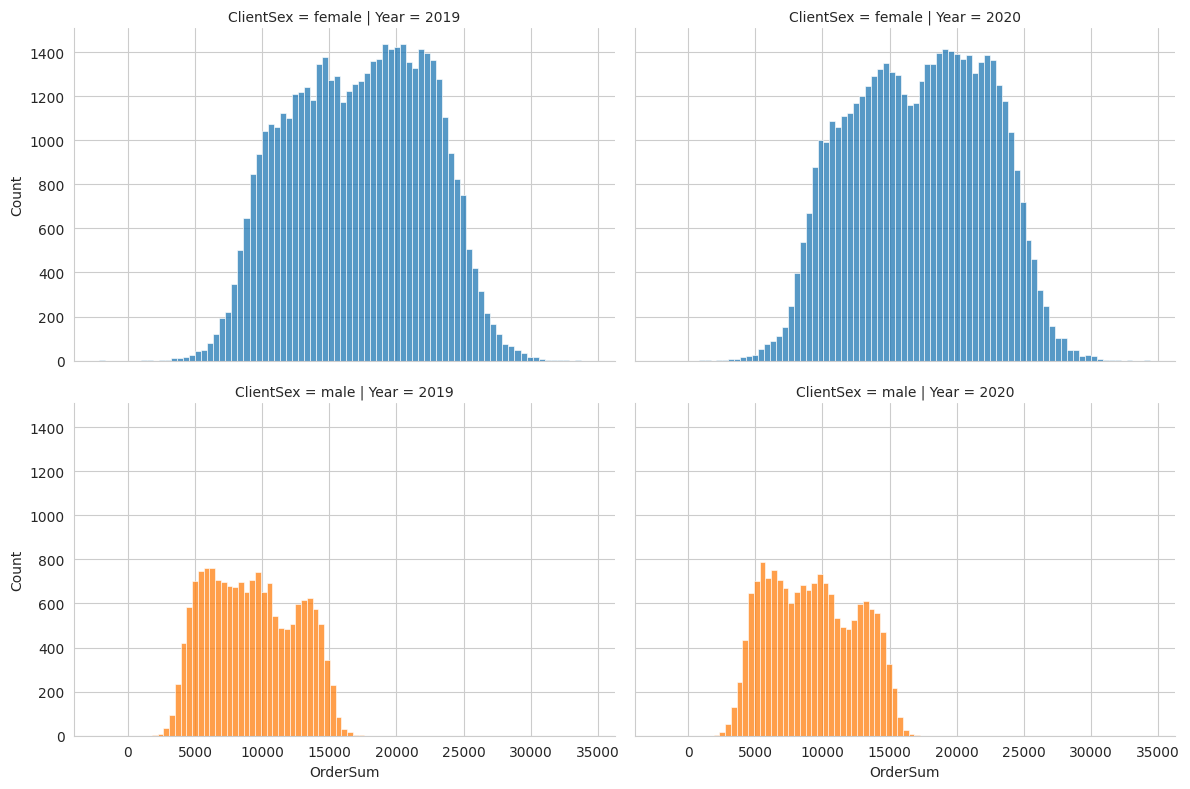

In [ ]:
g = sns.FacetGrid(df, col='Year', row='ClientSex', hue='ClientSex',height=4, aspect=1.5)
g.map(sns.histplot, 'OrderSum')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


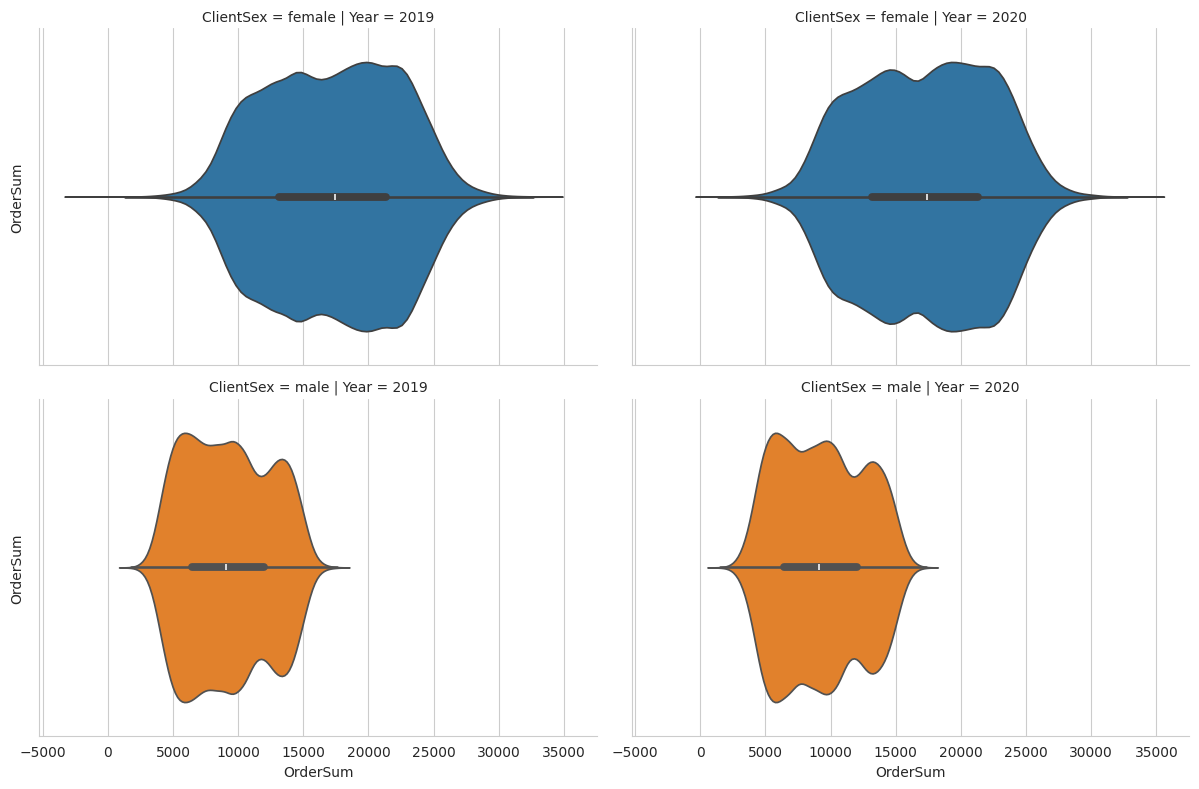

In [ ]:
g = sns.FacetGrid(df, col='Year', row='ClientSex', hue='ClientSex',height=4, aspect=1.5)
g.map(sns.violinplot, 'OrderSum')
for ax in g.axes.flat:
    ax.set_ylabel('OrderSum')
plt.show()

9. Построить совместную диаграмму зависимости суммы заказа мужчин от женщин, в день (по краям графика должны идти гистограммы распределения сумм заказов)(предварительно нужно создать таблицу, где индекс – день, а два столбца соответствуют суммам заказов мужчин отдельно и женщин отдельно, на каждый день)


In [ ]:
df['dd'] = pd.to_datetime(df['OrderDate']).dt.date
df.head()

,OrderId,OrderDate,OrderSum,ClientId,ClientSex,ClientAge,Year,mm-dd,yy-mm,dd
0,1000000,2020-05-28,23217.0,0,female,53,2020,05-28,20-05,2020-05-28
1,1000001,2020-04-18,25296.0,0,female,53,2020,04-18,20-04,2020-04-18
2,1000002,2019-08-19,23500.0,0,female,53,2019,08-19,19-08,2019-08-19
3,1000003,2019-06-02,23819.0,0,female,53,2019,06-02,19-06,2019-06-02
4,1000004,2020-05-18,23161.0,0,female,53,2020,05-18,20-05,2020-05-18


<Figure size 1400x1200 with 0 Axes>

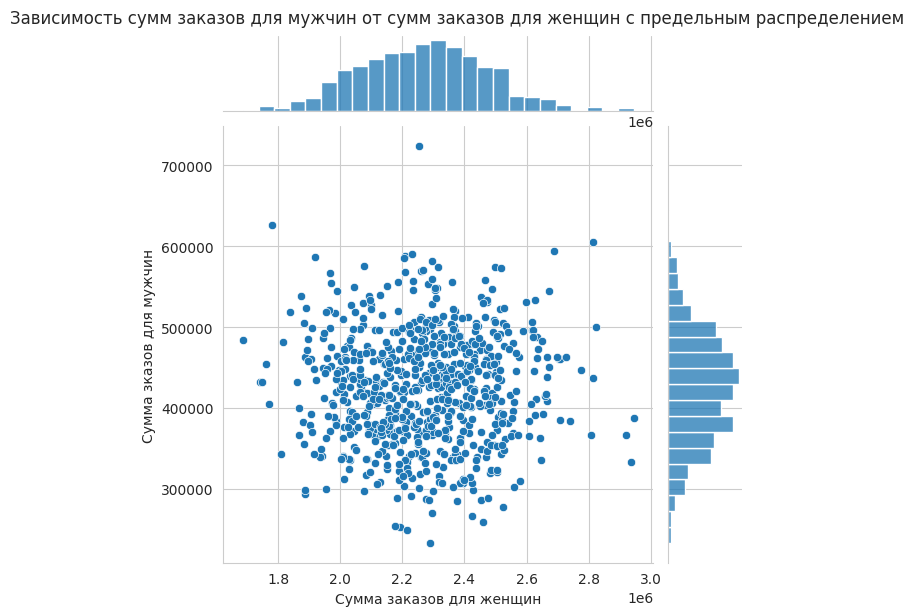

In [ ]:
day_sum = df.groupby(['dd', 'ClientSex'])['OrderSum'].sum().reset_index()
table = day_sum.pivot(index='dd', columns='ClientSex', values='OrderSum')
plt.figure(figsize=(14, 12))
sns.jointplot(data=table, x='female', y='male', kind='scatter', marginal_kws=dict(bins=25, fill=True))

plt.xlabel('Сумма заказов для женщин')
plt.ylabel('Сумма зказов для мужчин')
plt.suptitle('Зависимость сумм заказов для мужчин от сумм заказов для женщин с предельным распределением', y=1.02)
plt.show()

10. Построить диаграмму двумерной плотности распределения сумм заказов мужчин и женщин в день
Построить свою палитру цвета и применить ее к графику


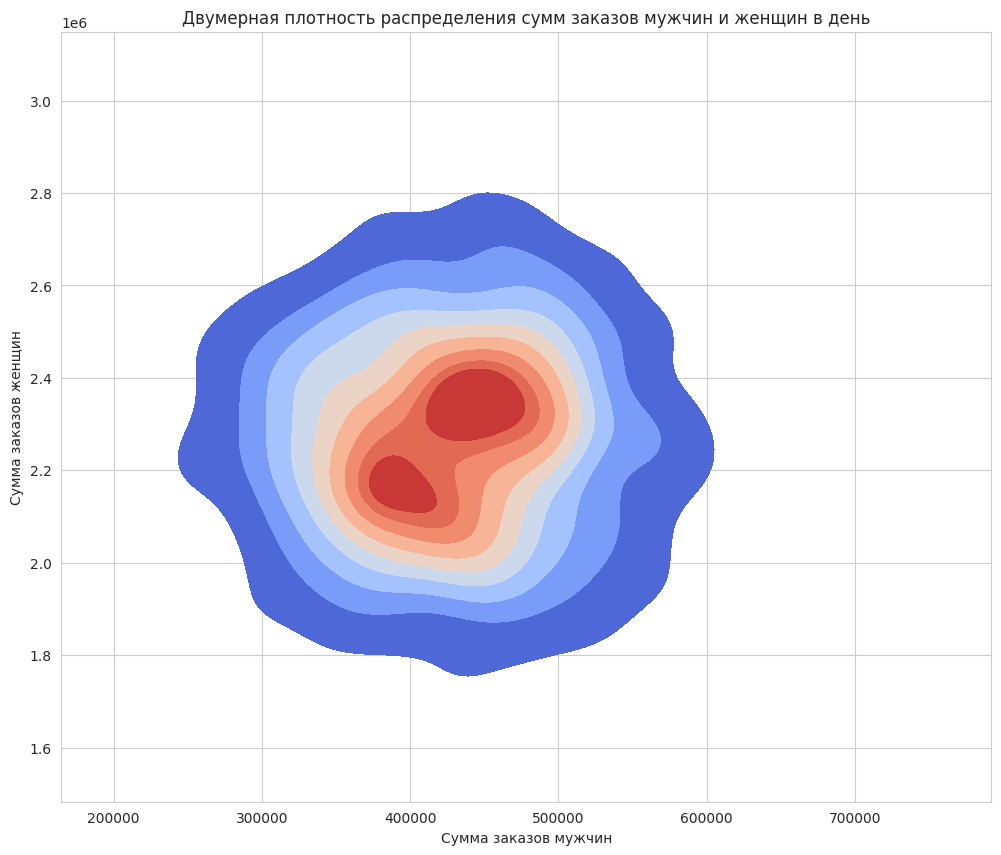

In [ ]:
grouped_data = df.groupby(['dd', 'ClientSex'])['OrderSum'].sum().reset_index()
table = grouped_data.pivot(values='OrderSum', columns='ClientSex', index='dd')
palette = sns.color_palette("coolwarm", as_cmap=True)
plt.figure(figsize=(12, 10))
sns.kdeplot(data=table, x='male', y='female', cmap=palette, fill=True)
plt.title('Двумерная плотность распределения сумм заказов мужчин и женщин в день')
plt.xlabel('Сумма заказов мужчин')
plt.ylabel('Сумма заказов женщин')
plt.show()